In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
#importing data
#df = pd.read_csv('Combined_LCA_Disclosure_Data_FY2020_to_FY2024.csv', low_memory=False)
df2020 = pd.read_csv('Combined_LCA_Disclosure_Data_FY2020.csv', low_memory=False)
df2021 = pd.read_csv('Combined_LCA_Disclosure_Data_FY2021.csv', low_memory=False)
df2022 = pd.read_csv('Combined_LCA_Disclosure_Data_FY2022.csv', low_memory=False)
df2023 = pd.read_csv('Combined_LCA_Disclosure_Data_FY2023.csv', low_memory=False)
df2024 = pd.read_csv('Combined_LCA_Disclosure_Data_FY2024.csv', low_memory=False)
all_data = [df2020, df2021,df2022,df2023,df2024]

df = pd.concat(all_data)
df.head(5)

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
0,I-200-19268-393467,Certified,2019-09-25,2019-10-01,NaN,H-1B,"APPLICATION ENGINEER, OMS [15-1199.02]",15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",Y,...,N,NaN,NaN,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
1,I-200-19268-638983,Certified,2019-09-25,2019-10-01,NaN,H-1B,BI DEVELOPER II,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,...,N,Y,BOTH,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
2,I-200-19268-177184,Certified,2019-09-25,2019-10-01,NaN,H-1B,QUALITY ENGINEER,17-2141,MECHANICAL ENGINEERS,Y,...,N,Y,BOTH,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
3,I-200-19268-936403,Certified,2019-09-25,2019-10-01,NaN,H-1B,"SOFTWARE DEVELOPER, APPLICATIONS",15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,...,N,Y,BOTH,NaN,Disclose Business,NaN,NaN,NaN,NaN,NaN
4,I-200-19268-394079,Certified,2019-09-25,2019-10-01,NaN,H-1B,QUALITY ENGINEER LEVEL II,15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",Y,...,N,Y,BOTH,NaN,Disclose Business,NaN,NaN,NaN,NaN,LEGAL@THEEGIANTS.COM


In [3]:
#overview
df.describe()

,TOTAL_WORKER_POSITIONS,NEW_EMPLOYMENT,CONTINUED_EMPLOYMENT,CHANGE_PREVIOUS_EMPLOYMENT,NEW_CONCURRENT_EMPLOYMENT,CHANGE_EMPLOYER,AMENDED_PETITION,EMPLOYER_PHONE_EXT,NAICS_CODE,EMPLOYER_POC_PHONE_EXT,AGENT_ATTORNEY_PHONE,AGENT_ATTORNEY_PHONE_EXT,WORKSITE_WORKERS,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,PREVAILING_WAGE,PW_OTHER_YEAR,TOTAL_WORKSITE_LOCATIONS
count,50088.000000,50088.000000,50088.000000,50088.000000,50088.000000,50088.000000,50088.000000,3.452000e+03,50088.000000,3.469000e+03,3.498500e+04,2.410000e+03,39677.000000,5.008500e+04,1.734500e+04,49563.000000,2050.000000,39675.000000
mean,1.887518,0.527152,0.421179,0.135242,0.011061,0.472329,0.323271,3.313728e+03,428562.834451,3.247610e+03,1.342177e+10,5.052323e+03,1.998765,1.114214e+05,1.313184e+05,96881.301885,2021.310732,1.505381
std,7.134253,4.724204,2.364067,0.806910,0.145467,3.610124,1.248007,1.210780e+05,205178.527050,1.204717e+05,1.175930e+10,4.588725e+04,7.828630,5.650769e+04,6.809446e+04,41079.103862,1.625364,0.737067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1111.000000,0.000000e+00,1.201521e+09,0.000000e+00,1.000000,1.174000e+01,1.200000e+01,7.250000,2013.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,336111.000000,0.000000e+00,1.212572e+10,1.000000e+02,1.000000,8.200000e+04,9.570200e+04,76440.000000,2020.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,541511.000000,1.000000e+00,1.415371e+10,1.200000e+02,1.000000,1.050000e+05,1.245950e+05,95098.000000,2022.000000,1.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.120000e+02,541512.000000,3.550000e+02,1.617574e+10,2.360000e+02,1.000000,1.387000e+05,1.602000e+05,119122.000000,2023.000000,2.000000
max,150.000000,150.000000,100.000000,25.000000,5.000000,100.000000,40.000000,7.002824e+06,926130.000000,7.002824e+06,9.184722e+11,2.108820e+06,150.000000,3.500000e+06,1.750000e+06,355430.000000,2023.000000,10.000000


In [4]:
#checking for missing value
df.isnull()

,CASE_NUMBER,CASE_STATUS,RECEIVED_DATE,DECISION_DATE,ORIGINAL_CERT_DATE,VISA_CLASS,JOB_TITLE,SOC_CODE,SOC_TITLE,FULL_TIME_POSITION,...,WILLFUL_VIOLATOR,SUPPORT_H1B,STATUTORY_BASIS,APPENDIX_A_ATTACHED,PUBLIC_DISCLOSURE,PREPARER_LAST_NAME,PREPARER_FIRST_NAME,PREPARER_MIDDLE_INITIAL,PREPARER_BUSINESS_NAME,PREPARER_EMAIL
0,False,False,False,False,True,False,False,False,False,False,...,False,True,True,True,False,True,True,True,True,True
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,True,True,True,True
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,True,True,True,True
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,True,True,True,True
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9248,False,False,False,False,True,False,False,False,False,False,...,False,True,True,True,False,False,False,True,False,False
9249,False,False,False,False,True,False,False,False,False,False,...,False,True,True,True,False,True,True,True,True,True
9250,False,False,False,False,True,False,False,False,False,False,...,False,True,True,True,False,False,False,True,False,False
9251,False,False,False,False,True,False,False,False,False,False,...,False,True,True,True,False,False,False,True,False,False


In [5]:
#Information regarding data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50089 entries, 0 to 9252
Data columns (total 96 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CASE_NUMBER                     50089 non-null  object 
 1   CASE_STATUS                     50089 non-null  object 
 2   RECEIVED_DATE                   50089 non-null  object 
 3   DECISION_DATE                   50089 non-null  object 
 4   ORIGINAL_CERT_DATE              1717 non-null   object 
 5   VISA_CLASS                      50089 non-null  object 
 6   JOB_TITLE                       50088 non-null  object 
 7   SOC_CODE                        50089 non-null  object 
 8   SOC_TITLE                       50089 non-null  object 
 9   FULL_TIME_POSITION              50088 non-null  object 
 10  BEGIN_DATE                      50088 non-null  object 
 11  END_DATE                        50088 non-null  object 
 12  TOTAL_WORKER_POSITIONS          50088 

['2019-10-01' '2019-10-02' '2019-10-03' '2019-10-04' '2019-10-05'
 '2019-10-06' '2019-10-07' '2019-10-08' '2019-10-09' '2020-10-01'
 '2020-10-02' '2020-10-05' '2020-10-06' '2020-10-07' '2020-10-08'
 '2020-10-09' '2020-10-13' '2020-10-14' '2021-10-01' '2021-10-02'
 '2021-10-03' '2021-10-04' '2021-10-05' '2021-10-06' '2021-10-07'
 '2021-10-08' '2022-12-30' '2022-12-29' '2022-12-28' '2022-12-27'
 '2022-12-23' '2022-12-22' '2023-12-29' '2023-12-28' '2023-12-27'
 '2023-12-26' '2023-12-22' '2023-12-21' '2023-12-20']
YEAR
2019    11456
2020    10900
2021    10591
2022     7889
2023     9253
Name: count, dtype: int64


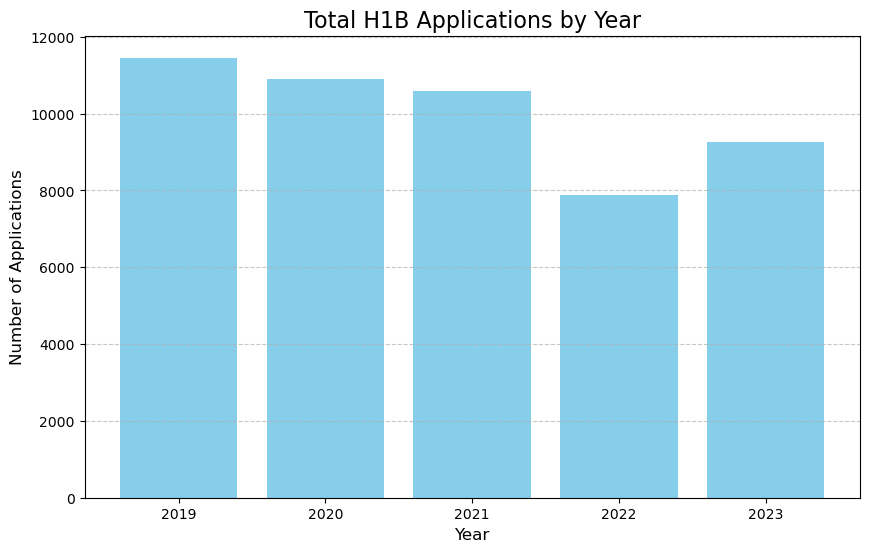

In [6]:
"""
Total number of applications over the years (2020-2024) 
Switched to submission date beause decision date is only 2019, not sure why

Still working on this!
"""
df['YEAR'] = pd.to_datetime(df['DECISION_DATE']).dt.year  # Extract year from decision date
yearly_applications = df['YEAR'].value_counts().sort_index()
print(df.DECISION_DATE.unique())
print(yearly_applications)

#plot
plt.figure(figsize=(10, 6))
plt.bar(yearly_applications.index, yearly_applications.values, color='skyblue')
plt.title('Total H1B Applications by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Applications', fontsize=12)
plt.xticks(yearly_applications.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

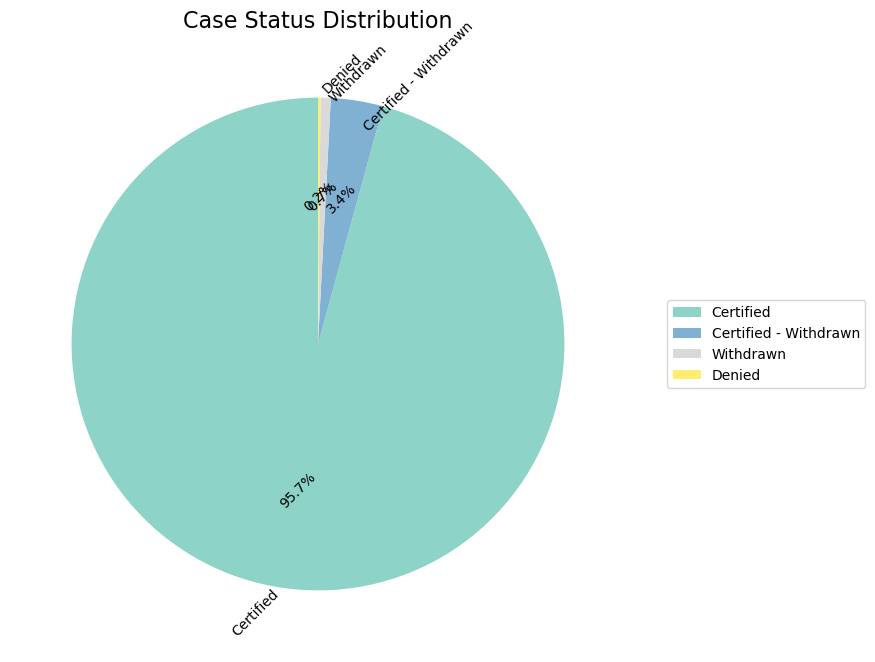

In [7]:
# Distribution of case statuses
case_status_counts = df['CASE_STATUS'].value_counts()

# Case status distribution using pie chart
plt.figure(figsize=(8, 8))
case_status_counts.plot(kind='pie', startangle=90, cmap='Set3',autopct='%1.1f%%', textprops={'rotation':45},legend=True)
plt.title('Case Status Distribution', fontsize=16)
plt.ylabel('')  # Remove y-label for better appearance
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))
plt.show()

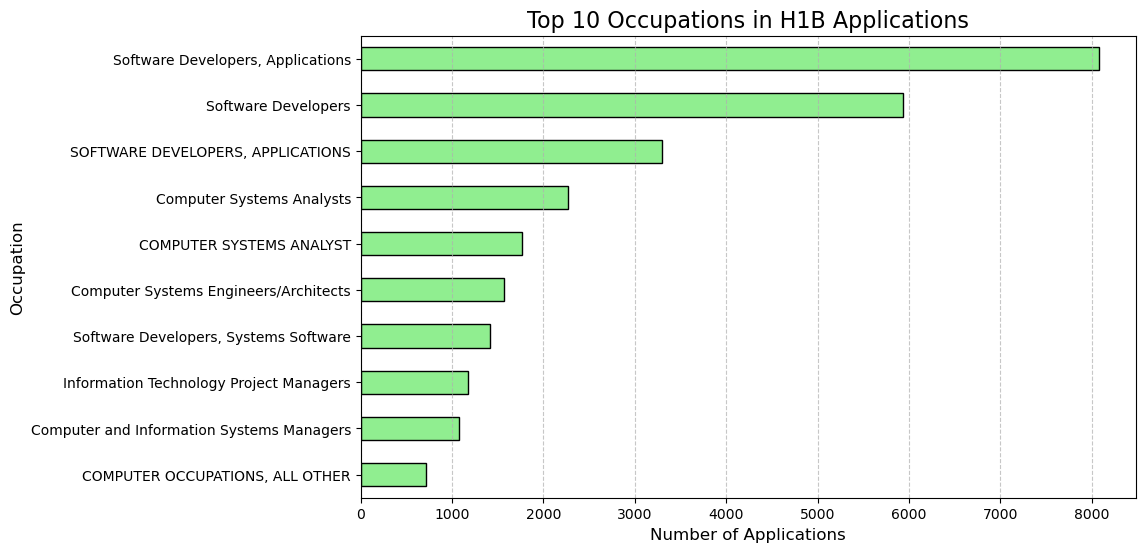

In [33]:
# Top occupations in the dataset
top_occupations = df['SOC_TITLE'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_occupations.plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title('Top 10 Occupations in H1B Applications', fontsize=16)
plt.xlabel('Number of Applications', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [34]:
unique_units = df['PW_UNIT_OF_PAY'].unique()
print(unique_units)

['Year' 'Hour' 'Bi-Weekly' 'Month' 'Week']


In [35]:
"""
Salary Analysis
"""
df['PREVAILING_WAGE'] = pd.to_numeric(df['PREVAILING_WAGE'], errors='coerce')
df = df[df['PREVAILING_WAGE'] > 0]  # Filter out non-positive values

conversion_factors = {
    'Year': 1,            # No Normalization
    'Month': 12,          # 12 months in a year
    'Bi-Weekly': 26,      # 26 bi-weekly periods in a year
    'Week': 52,           # 52 weeks in a year
    'Hour': 2080          # 52 weeks in a year x 40 hrs a week
}

df['ANNUAL_WAGE'] = df.apply(
    lambda row: row['PREVAILING_WAGE'] * conversion_factors.get(row['PW_UNIT_OF_PAY'], 1),
    axis=1
)

In [36]:
print(df[df['PW_UNIT_OF_PAY'] == 'Hour'][['PREVAILING_WAGE', 'PW_UNIT_OF_PAY', 'ANNUAL_WAGE']].head())

    PREVAILING_WAGE PW_UNIT_OF_PAY  ANNUAL_WAGE
1              39.0           Hour      81120.0
2              39.0           Hour      81120.0
3              53.0           Hour     110240.0
59             28.0           Hour      58240.0
60             29.0           Hour      60320.0


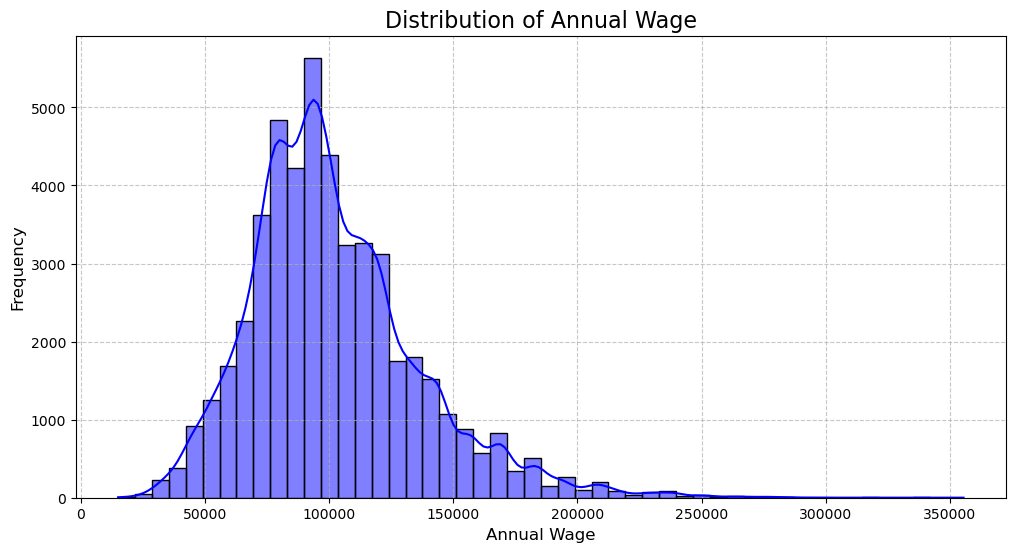

In [37]:
# Plot the distribution of Annual Wage
plt.figure(figsize=(12, 6))
sns.histplot(df['ANNUAL_WAGE'], bins=50, kde=True, color='blue')
plt.title('Distribution of Annual Wage', fontsize=16)
plt.xlabel('Annual Wage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

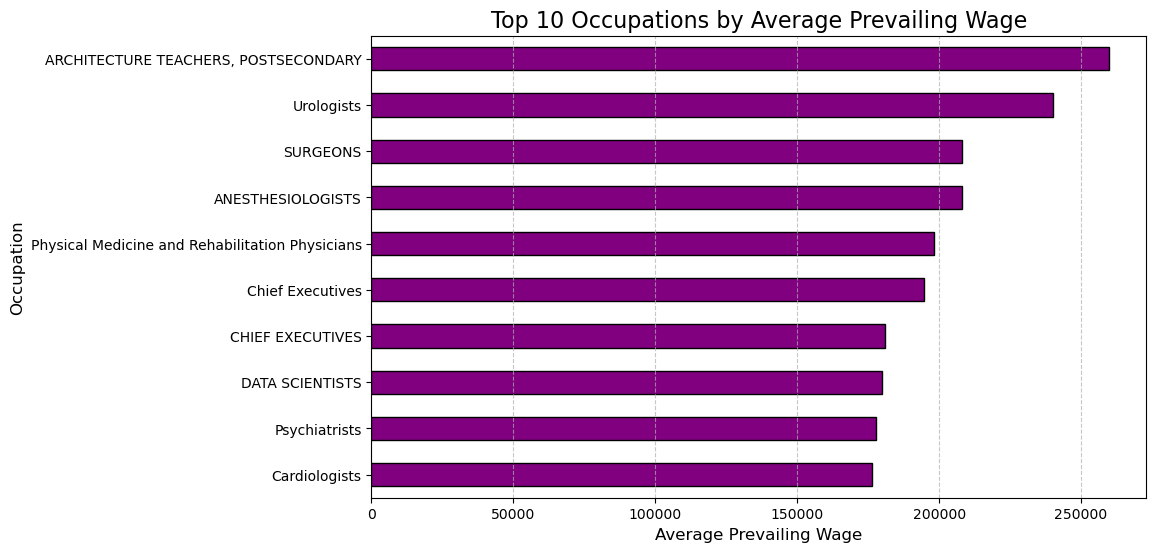

In [38]:
# Analyze average salaries by occupation
avg_salaries = df.groupby('SOC_TITLE')['PREVAILING_WAGE'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
avg_salaries.plot(kind='barh', color='purple', edgecolor='black')
plt.title('Top 10 Occupations by Average Prevailing Wage', fontsize=16)
plt.xlabel('Average Prevailing Wage', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

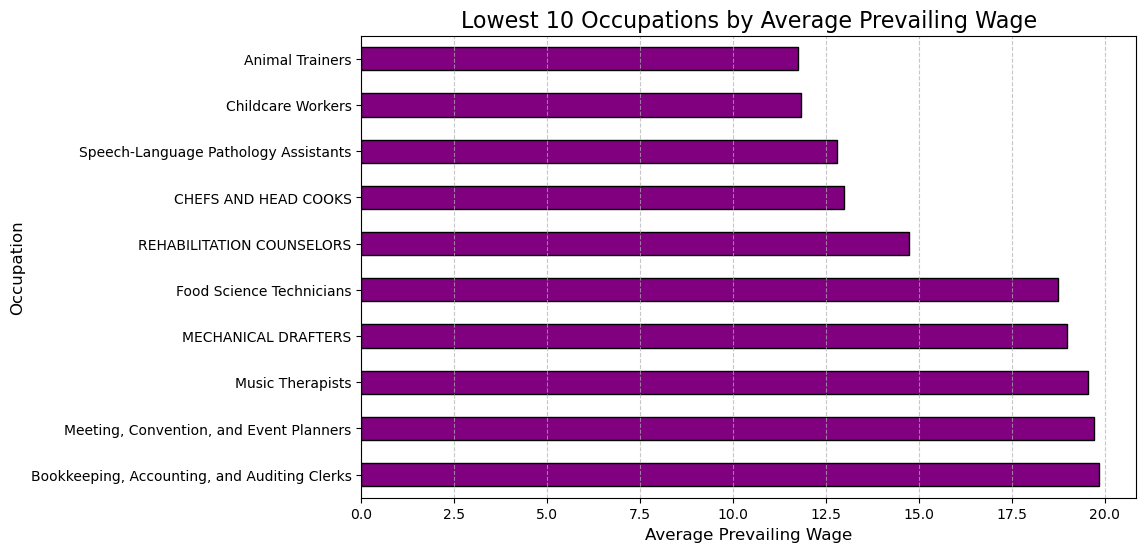

In [39]:
# Analyze average salaries by occupation
avg_salaries_rev = df.groupby('SOC_TITLE')['PREVAILING_WAGE'].mean().sort_values(ascending=True).head(10)

plt.figure(figsize=(10, 6))
avg_salaries_rev.plot(kind='barh', color='purple', edgecolor='black')
plt.title('Lowest 10 Occupations by Average Prevailing Wage', fontsize=16)
plt.xlabel('Average Prevailing Wage', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

CASE_STATUS
Certified                47952
Certified - Withdrawn     1291
Withdrawn                  237
Denied                      83
Name: count, dtype: int64


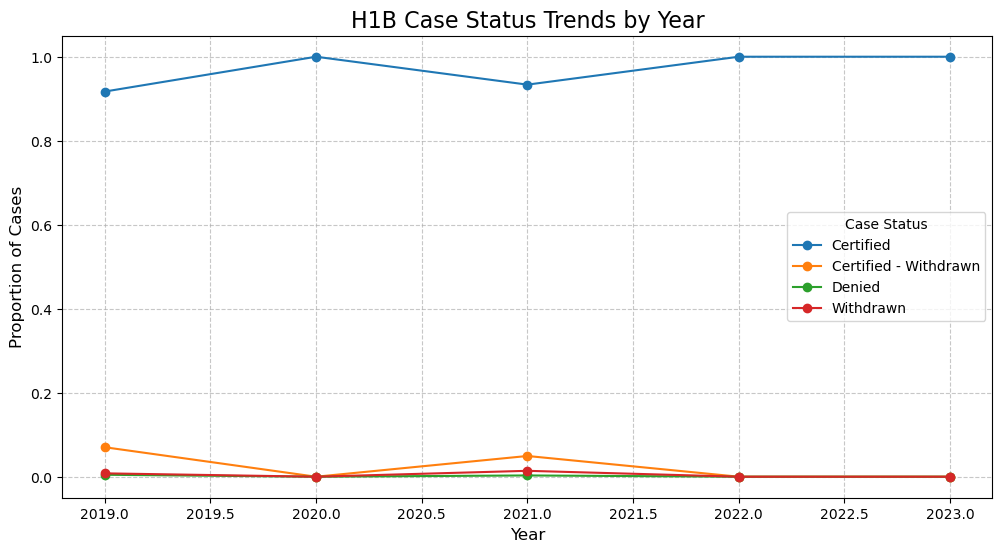

In [40]:
"""
Case Status Insights
Calculate approval rates by year.
"""
yearly_status = df.groupby('YEAR')['CASE_STATUS'].value_counts(normalize=True).unstack().fillna(0)
print(df.CASE_STATUS.value_counts())

#plot
plt.figure(figsize=(12, 6))
for status in yearly_status.columns:
    plt.plot(yearly_status.index, yearly_status[status], marker='o', label=status)

plt.title('H1B Case Status Trends by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Proportion of Cases', fontsize=12)
plt.legend(title='Case Status')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [41]:
#get the processing time from subtracting decision date and start date and case status is certified
#processing the time into usable format

df['BEGIN_DATE'] = pd.to_datetime(df['BEGIN_DATE'])
df['DECISION_DATE'] = pd.to_datetime(df['DECISION_DATE'])
print(df.BEGIN_DATE.value_counts())
print(df.DECISION_DATE.value_counts())
df['Decision_Duration'] = df['BEGIN_DATE'] - df['DECISION_DATE']

df.Decision_Duration

BEGIN_DATE
2021-10-01    1688
2020-10-01    1525
2020-10-12     842
2020-10-05     817
2021-10-04     804
              ... 
2019-07-16       1
2021-05-07       1
2021-07-21       1
2019-06-03       1
2019-05-18       1
Name: count, Length: 1249, dtype: int64
DECISION_DATE
2019-10-03    2712
2019-10-04    2327
2021-10-07    2104
2021-10-01    2084
2019-10-02    2078
2021-10-06    1997
2021-10-05    1932
2019-10-01    1868
2021-10-04    1778
2023-12-29    1573
2020-10-14    1541
2023-12-28    1509
2022-12-28    1403
2023-12-27    1379
2022-12-29    1343
2022-12-30    1336
2023-12-26    1330
2022-12-23    1321
2023-12-22    1318
2020-10-01    1308
2023-12-21    1294
2022-12-27    1266
2020-10-07    1229
2020-10-08    1225
2022-12-22    1219
2020-10-05    1149
2020-10-06    1147
2020-10-13    1137
2020-10-02    1111
2020-10-09    1053
2023-12-20     849
2019-10-07     822
2021-10-08     689
2019-10-09     658
2019-10-08     448
2019-10-06      17
2021-10-03       4
2019-10-05       3
2021

0        6 days
1       99 days
2        2 days
3        6 days
4        8 days
         ...   
9247    12 days
9248   176 days
9249    75 days
9250    13 days
9251     2 days
Name: Decision_Duration, Length: 49563, dtype: timedelta64[ns]

In [42]:
#filtering current df
df1 = df.copy()
df1 = df1[['CASE_STATUS','Decision_Duration','RECEIVED_DATE','SOC_TITLE','FULL_TIME_POSITION','EMPLOYER_NAME','EMPLOYER_CITY','EMPLOYER_STATE','AGENT_REPRESENTING_EMPLOYER','TOTAL_WORKER_POSITIONS','WORKSITE_CITY','WORKSITE_STATE','WORKSITE_WORKERS','WORKSITE_POSTAL_CODE','AGENT_ATTORNEY_CITY','AGENT_ATTORNEY_STATE','ANNUAL_WAGE','H_1B_DEPENDENT','SUPPORT_H1B']]

In [44]:
'''
Preprocessing features
#:'Decision_Duration','TOTAL_WORKER_POSITIONS','ANNUAL_WAGE'
Categorical:'CASE_STATUS','RECEIVED_DATE','SOC_TITLE','FULL_TIME_POSITION','EMPLOYER_NAME','EMPLOYER_CITY','EMPLOYER_STATE','AGENT_REPRESENTING_EMPLOYER','WORKSITE_CITY','WORKSITE_STATE','WORKSITE_WORKERS','WORKSITE_POSTAL_CODE','AGENT_ATTORNEY_CITY','AGENT_ATTORNEY_STATE','H_1B_DEPENDENT','SUPPORT_H1B']
'''

cat_columns = ['CASE_STATUS','RECEIVED_DATE','SOC_TITLE','FULL_TIME_POSITION','EMPLOYER_NAME','EMPLOYER_CITY','EMPLOYER_STATE','AGENT_REPRESENTING_EMPLOYER','WORKSITE_CITY','WORKSITE_STATE','WORKSITE_WORKERS','WORKSITE_POSTAL_CODE','AGENT_ATTORNEY_CITY','AGENT_ATTORNEY_STATE','H_1B_DEPENDENT','SUPPORT_H1B']
for col in cat_columns:
    label_encoder = LabelEncoder()
    df1[col] = label_encoder.fit_transform(df1[col])


In [45]:
df1.head(5)

,CASE_STATUS,Decision_Duration,RECEIVED_DATE,SOC_TITLE,FULL_TIME_POSITION,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,AGENT_REPRESENTING_EMPLOYER,TOTAL_WORKER_POSITIONS,WORKSITE_CITY,WORKSITE_STATE,WORKSITE_WORKERS,WORKSITE_POSTAL_CODE,AGENT_ATTORNEY_CITY,AGENT_ATTORNEY_STATE,ANNUAL_WAGE,H_1B_DEPENDENT,SUPPORT_H1B
0,0,6 days,182,108,1,6854,1192,37,2,1.0,1858,37,21,2608,139,15,95118.0,0,4
1,0,99 days,182,600,1,3555,1299,4,2,1.0,446,45,21,2311,415,9,81120.0,2,2
2,0,2 days,182,404,1,4203,2482,23,2,1.0,1127,23,21,2842,887,23,81120.0,2,2
3,0,6 days,182,600,1,11459,2732,23,0,1.0,3997,23,21,2855,991,54,110240.0,2,2
4,0,8 days,182,108,1,4025,467,13,0,1.0,429,37,21,2665,991,54,65333.0,2,2


In [46]:
corr = df1.corr()
corr_matrix = corr['Decision_Duration']
print(corr_matrix)



CASE_STATUS                   -0.218948
Decision_Duration              1.000000
RECEIVED_DATE                  0.162887
SOC_TITLE                      0.028397
FULL_TIME_POSITION             0.040426
EMPLOYER_NAME                 -0.011217
EMPLOYER_CITY                  0.101120
EMPLOYER_STATE                -0.013289
AGENT_REPRESENTING_EMPLOYER    0.079734
TOTAL_WORKER_POSITIONS         0.074150
WORKSITE_CITY                  0.031024
WORKSITE_STATE                -0.003687
WORKSITE_WORKERS              -0.058637
WORKSITE_POSTAL_CODE           0.073462
AGENT_ATTORNEY_CITY           -0.005117
AGENT_ATTORNEY_STATE          -0.040533
ANNUAL_WAGE                    0.146036
H_1B_DEPENDENT                -0.111916
SUPPORT_H1B                    0.154561
Name: Decision_Duration, dtype: float64


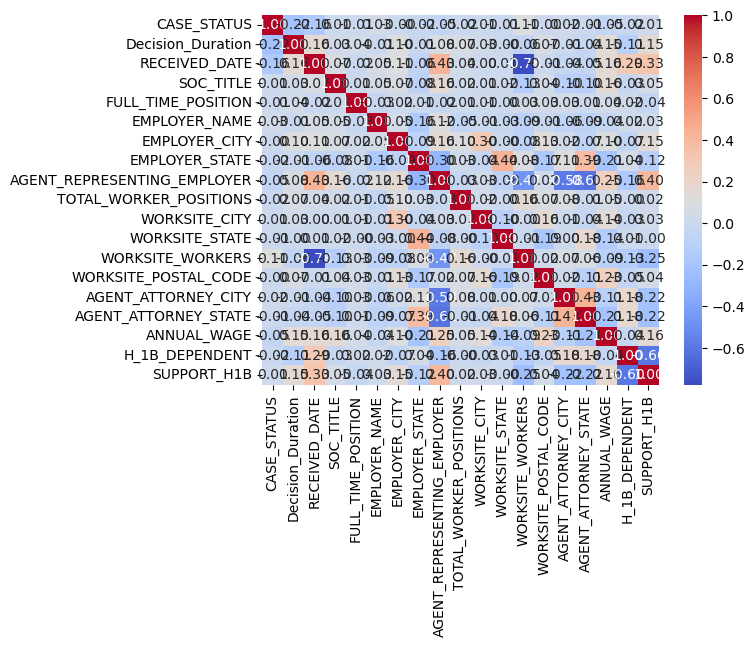

In [47]:
#plot
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()